In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import display # Allows the use of display() for DataFrames

%matplotlib inline

In [2]:
ref_results = pd.read_csv('referendum.csv')
ref_results.describe()
ref_results[ref_results['Area']=='Luton']
ref_results.head(5)

,ID,Region Code,Region,Area Code,Area,Electorate,Expected Ballots,Verified Ballot Papers,Percent Turnout,Votes Cast,...,Remain,Leave,Rejected Ballots,No Official Mark,Multiple Marks,Writing or Mark,Unmarked or Void,Percent Remain,Percent Leave,Percent Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [3]:
ref_results['Area'].sort_values()

192                   Aberdeen City
193                   Aberdeenshire
264                            Adur
138                       Allerdale
51                     Amber Valley
199                           Angus
194                 Argyll and Bute
265                            Arun
80                         Ashfield
236                         Ashford
216                  Aylesbury Vale
36                          Babergh
88             Barking and Dagenham
89                           Barnet
373                        Barnsley
139               Barrow-in-Furness
11                         Basildon
225           Basingstoke and Deane
81                        Bassetlaw
271    Bath and North East Somerset
4                           Bedford
90                           Bexley
354                      Birmingham
59                            Blaby
134           Blackburn with Darwen
135                       Blackpool
325                   Blaenau Gwent
52                         B

In [108]:
def non_cast(row):
    return row['Expected Ballots'] - row['Votes Cast']

df = ref_results

df['Not Cast'] = df.apply(non_cast, axis=1)
df.head(5)

,ID,Region Code,Region,Area Code,Area,Electorate,Expected Ballots,Verified Ballot Papers,Percent Turnout,Votes Cast,...,Leave,Rejected Ballots,No Official Mark,Multiple Marks,Writing or Mark,Unmarked or Void,Percent Remain,Percent Leave,Percent Rejected,Not Cast
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,53216,77,0,32,7,38,39.11,60.89,0.09,5
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,47773,135,0,85,0,50,43.45,56.55,0.16,17
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,54522,69,0,21,0,48,41.92,58.08,0.07,9
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,57765,34,0,8,3,23,27.72,72.28,0.04,19
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,44569,69,0,26,1,42,48.22,51.78,0.08,1


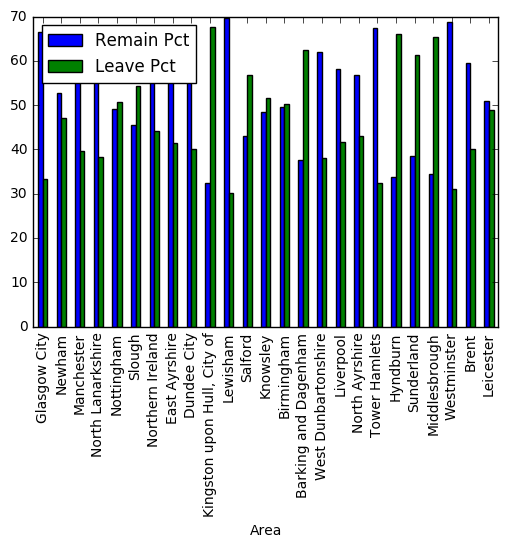

In [112]:
def remain_pct(row):
    # returns the percentage of votes
    return float(row['Remain'] * 100) / row['Votes Cast']

def leave_pct(row):
    # returns the percentage of votes
    return float(row['Leave'] * 100) / row['Votes Cast']

df['Remain Pct'] = df.apply(remain_pct, axis=1)
df['Leave Pct'] = df.apply(leave_pct, axis=1)

df = ref_results.sort_values(by='Percent Turnout', ascending=True).head(25)
features = ['Remain Pct','Leave Pct']

df = df.reindex()

df.plot(x='Area',y=features, sort_columns=True, kind='bar')

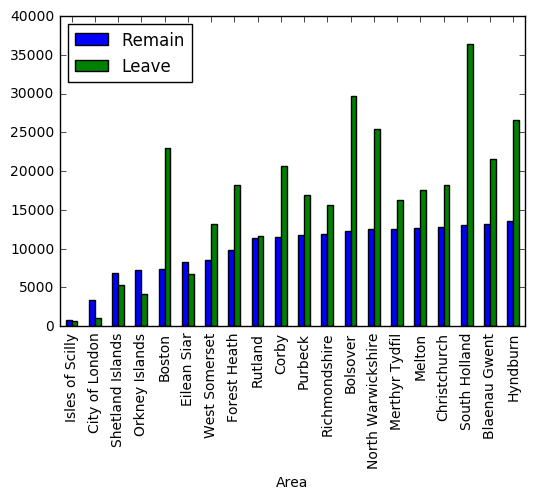

In [111]:
feature = ['Remain','Leave']
df = ref_results.sort_values(by=feature, ascending=True).head(20)
df.plot(x='Area',y=feature, kind='bar')

In [122]:
display(df.columns)

Index(['ID', 'Region Code', 'Region', 'Area Code', 'Area', 'Electorate',
       'Expected Ballots', 'Verified Ballot Papers', 'Percent Turnout',
       'Votes Cast', 'Valid Votes', 'Remain', 'Leave', 'Rejected Ballots',
       'No Official Mark', 'Multiple Marks', 'Writing or Mark',
       'Unmarked or Void', 'Percent Remain', 'Percent Leave',
       'Percent Rejected', 'Not Cast', 'Remain Pct', 'Leave Pct'],
      dtype='object')

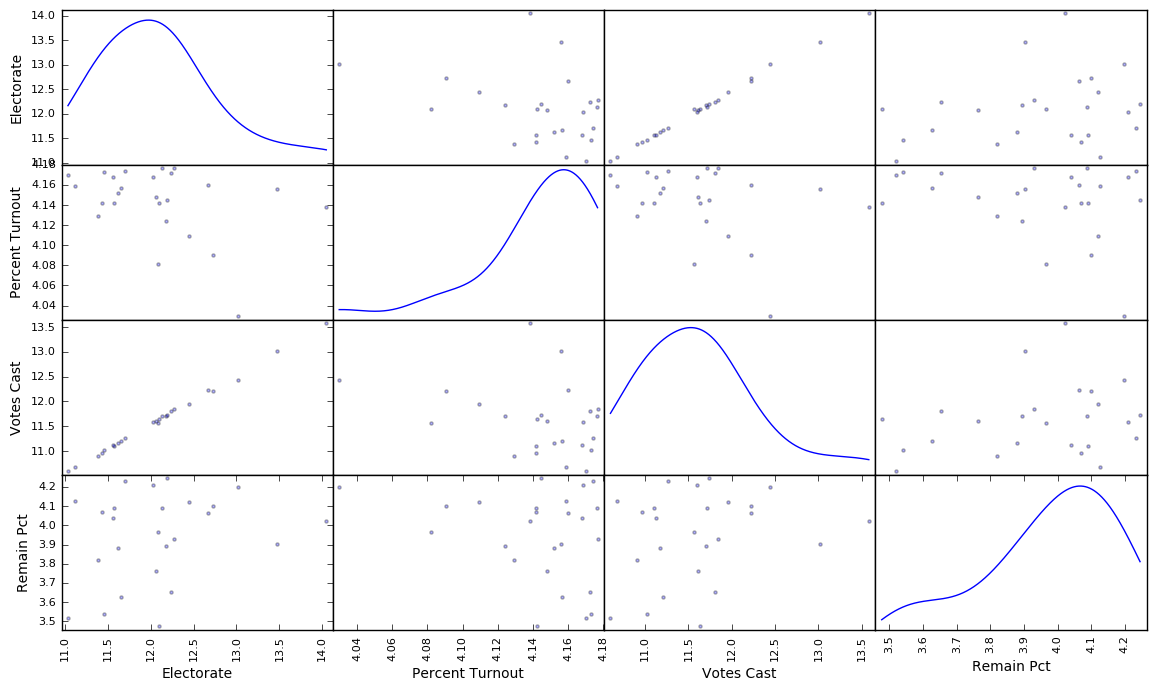

In [123]:
# Build correlation matrix
data = df[['Electorate','Percent Turnout','Votes Cast','Remain Pct']]

#axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
#corr = data.corr().as_matrix()
#for i, j in zip(*np.triu_indices_from(axes, k=1)):
#    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    
log_data = np.log(data)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [124]:
log_data.corr()

,Electorate,Percent Turnout,Votes Cast,Remain Pct
Electorate,1.000000,-0.354983,0.998912,0.250328
Percent Turnout,-0.354983,1.000000,-0.311002,-0.270637
Votes Cast,0.998912,-0.311002,1.000000,0.240995
Remain Pct,0.250328,-0.270637,0.240995,1.000000


In [125]:
ref_census = pd.read_csv('census.csv')
ref_census.describe()
ref_census.columns
ref_census.head(5)

/Users/sergeboo/Software/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Type,Code,Area,All Residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 and Over
0,Country,K02000001,United Kingdom,63182175,3913932,3516698,3669311,3996426,4297158,4306308,...,4643071,4094427,3614087,3807952,3017482,2462751,2006005,1604771,846836.0,439248.0
1,Country,K04000001,England and Wales,56075912,3496750,3135711,3258677,3539385,3807245,3836609,...,4100526,3601694,3183915,3377162,2674161,2178672,1777547,1338005,825671.0,429017.0
2,Country,E92000001,England,53012456,3318449,2972632,3080929,3340265,3595321,3650881,...,3879815,3400095,2996992,3172277,2508154,2044129,1669345,1258773,776311.0,403817.0
3,Country,W92000004,Wales,3063456,178301,163079,177748,199120,211924,185728,...,220711,201599,186923,204885,166007,134543,108202,79232,49360.0,25200.0
4,Country,N92000002,Northern Ireland,1810863,124382,111287,119034,126241,126013,124099,...,131645,116933,99272,94290,82121,63479,50358,36366,21165.0,10231.0


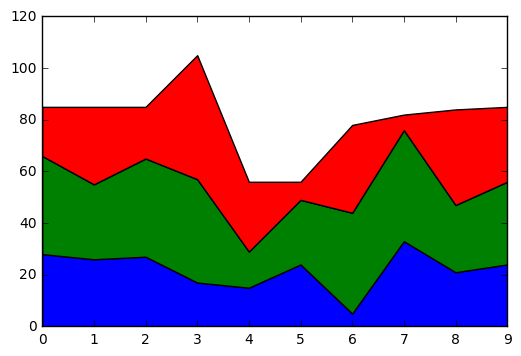

"from scipy.io import loadmat\nNYCdiseases = loadmat('NYCDiseases.mat') # loading a matlab file\nchickenpox = np.sum(NYCdiseases['chickenPox'],axis=0)\nmumps = np.sum(NYCdiseases['mumps'],axis=0)\nmeasles = np.sum(NYCdiseases['measles'],axis=0)\n\nimport matplotlib.patches as mpatches\nimport matplotlib.pyplot as plt\n\nplt.stackplot(arange(12)+1,\n          [chickenpox, mumps, measles], \n          colors=['#377EB8','#55BA87','#7E1137'])\nplt.xlim(1,12)\n\n# creating the legend manually\nplt.legend([mpatches.Patch(color='#377EB8'),  \n            mpatches.Patch(color='#55BA87'), \n            mpatches.Patch(color='#7E1137')], \n           ['chickenpox','mumps','measles'])\nplt.show()\n"

In [127]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib import pyplot as plt

fnx = lambda : np.random.randint(5, 50, 10)
y = np.row_stack((fnx(), fnx(), fnx()))
x = np.arange(10)

y1, y2, y3 = fnx(), fnx(), fnx()

#fig, ax = plt.subplots()
#ax.stackplot(x, y)
#plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3)
plt.show()

# Build Stack area plot
# https://pythonprogramming.net/stack-plot-matplotlib-tutorial/
'''from scipy.io import loadmat
NYCdiseases = loadmat('NYCDiseases.mat') # loading a matlab file
chickenpox = np.sum(NYCdiseases['chickenPox'],axis=0)
mumps = np.sum(NYCdiseases['mumps'],axis=0)
measles = np.sum(NYCdiseases['measles'],axis=0)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

plt.stackplot(arange(12)+1,
          [chickenpox, mumps, measles], 
          colors=['#377EB8','#55BA87','#7E1137'])
plt.xlim(1,12)

# creating the legend manually
plt.legend([mpatches.Patch(color='#377EB8'),  
            mpatches.Patch(color='#55BA87'), 
            mpatches.Patch(color='#7E1137')], 
           ['chickenpox','mumps','measles'])
plt.show()
'''